In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.4.1+cu121


In [ ]:
scalar = torch.tensor(7)
scalar.ndim

0

In [ ]:
scalar.item()

7

In [ ]:
vector = torch.tensor([5, 5])
vector.ndim

1

In [ ]:
MATRIX = torch.tensor([[1,2], [3, 4]])
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# Random tensor

random_tensor = torch.rand(2, 3, 4)
random_tensor

tensor([[[0.5413, 0.7988, 0.3782, 0.9792],
         [0.9576, 0.8108, 0.1177, 0.9762],
         [0.8503, 0.0789, 0.4581, 0.7795]],

        [[0.8212, 0.3052, 0.1280, 0.4930],
         [0.7687, 0.6052, 0.6895, 0.2345],
         [0.7885, 0.0633, 0.6930, 0.7676]]])

In [ ]:
# RANDOM TENSOR

random_image_tensor = torch.rand(size = (224, 224, 3))
random_image_tensor.shape,  random_image_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## ZEROS AND ONES

In [ ]:
zeros = torch.zeros(2, 3) # zeros

In [ ]:
ones = torch.ones(2, 2) # ones

## Create torch range

In [ ]:
one_to_ten = torch.arange(1, 11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
## Create tensor like
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
float_32_tensor = torch.tensor([1, 2, 3],
                               dtype=None, # what datatype is
                               device=None, # what device is the tensor on
                               requires_grad = False) # whether or not to track gradients
float_32_tensor

tensor([1, 2, 3])

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([1., 2., 3.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

tensor([1., 4., 9.], dtype=torch.float16)

In [ ]:
int_32 = torch.tensor([3, 6, 9], dtype = torch.long)
int_32

tensor([3, 6, 9])

In [ ]:
float_32_tensor * int_32

tensor([ 3, 12, 27])

In [ ]:
print(float_32_tensor.shape)
print(float_32_tensor.device)
print(float_32_tensor.dtype)

torch.Size([3])
cpu
torch.int64


# Math Operation

In [ ]:
tensor = torch.tensor([1, 2, 3])

In [ ]:
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)


In [ ]:
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
tensor @ tensor

tensor(14)

In [ ]:
tensor_A = torch.tensor([[3, 6],
                         [2, 5],
                         [1, 6]])
tensor_A

tensor([[3, 6],
        [2, 5],
        [1, 6]])

In [ ]:
tensor_B = tensor_A.T
tensor_B

tensor([[3, 2, 1],
        [6, 5, 6]])

In [ ]:
torch.matmul(tensor_A, tensor_B)

tensor([[45, 36, 39],
        [36, 29, 32],
        [39, 32, 37]])

# Find max, min, mean, sum, etc.

In [ ]:
x = torch.arange(0, 100, 10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [ ]:
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# mean requires float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
# sum

torch.sum(x), x.sum()

(tensor(450), tensor(450))

# Finding the positional mix and max

In [ ]:
# find the position having the minimum value with argmin()
x.argmin()

tensor(0)

In [ ]:
x[0]

tensor(0)

In [ ]:
# Find the position having the max value

x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(90)

## reshaping, stacking, squeezing and unsqueezing tensors

* reshape - reshapes an input tensor to a defined shape
* view - return a view of input tensor of certain shape but keep the same memory as the original tensor
* stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* squeeze - remove all `1` dimensiosn from a tensor
* unsqueeze - add a `1` dimension to a target tensor
* permute - return a view with dimensions permuted (swapped) in a certain way

In [ ]:
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# reshape
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# change the view

z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# changing z can change x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# stack tensors
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked, x_stacked.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 torch.Size([4, 9]))

In [ ]:
# squeeze
x_reshaped.shape

torch.Size([1, 9])

In [ ]:
x_squeezed = x_reshaped.squeeze()

In [ ]:
x_reshaped.squeeze().shape

torch.Size([9])

In [ ]:
# torch.unsqueeze()
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print('x unsqueezed', x_unsqueezed)
print('shape of x unsqueezed', x_unsqueezed.shape)

x unsqueezed tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
shape of x unsqueezed torch.Size([1, 9])


In [ ]:
# torch.permute - rearrange the dimensions of tensor in a specified order
x_original = torch.rand(224, 224, 3)

# Permute the original tensor to rearrange the axis
x_permuted = x_original.permute(2, 0, 1)

print(f'original shape: {x_original.shape}')
print(f'permuted shape: {x_permuted.shape}')

original shape: torch.Size([224, 224, 3])
permuted shape: torch.Size([3, 224, 224])


## Index (selecting data from tensors)

In [ ]:
# converting from numpy to tensor, datatype is float64
arr = np.arange(1., 8.)
tensor = torch.from_numpy(arr)
arr, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# not change tensor when changing numpy (independent)

arr = arr + 1
arr, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# converting from tensor to numpy makes the array datatype float32

tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (take random out of random)

To reduce the randomness in neural networks and Pytorch comes the concept a **random seed**.

In [ ]:
# Create two random tensor
random_tensor_A = torch.rand(3, 4)
random_tensor_b = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_b)
print(random_tensor_A == random_tensor_b)

tensor([[0.3066, 0.8428, 0.1206, 0.7504],
        [0.1039, 0.2565, 0.3796, 0.3302],
        [0.6718, 0.1542, 0.6859, 0.7168]])
tensor([[0.1428, 0.2313, 0.7298, 0.0168],
        [0.0015, 0.7005, 0.8230, 0.0908],
        [0.8334, 0.2048, 0.6666, 0.9808]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# add random seed

RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED) # work 1 block of code
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED) # work 1 block of code
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


# GPU = faster computation on numbers, thanks to CUDA + NVIDIA + PyTorch

### 1. Getting a gpu
1. Use GG Colab
2. Use my own GPU - takes a bit of setup
2. Use cloud computing - GCP, AWS, Azure

In [ ]:
!nvidia-smi

Sat Oct  5 13:11:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 2. Check for GPU assess with PyTorch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# setup device diagnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# count number of devices
torch.cuda.device_count()

1

### 3. Putting tensors (or models) on the GPU
GPU results in faster computation

In [ ]:
tensor = torch.tensor([1, 2, 3])

print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# move tensor to GPU (if available)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [ ]:
# if tensor is on gpu, can't transform it to numpy
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# fix this, set it to cpu

tensor_cpu = tensor_on_gpu.cpu().numpy()
tensor_cpu

array([1, 2, 3])

In [ ]:
from torch import nn

In [ ]:
# parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# Create train, test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y [train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plot training & test
  """
  plt.figure(figsize=(10,7))

  # plot training in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Train data')

  # plot test in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test data')

  # are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s = 4, label = 'Prediction')

  plt.legend(prop={'size': 14})

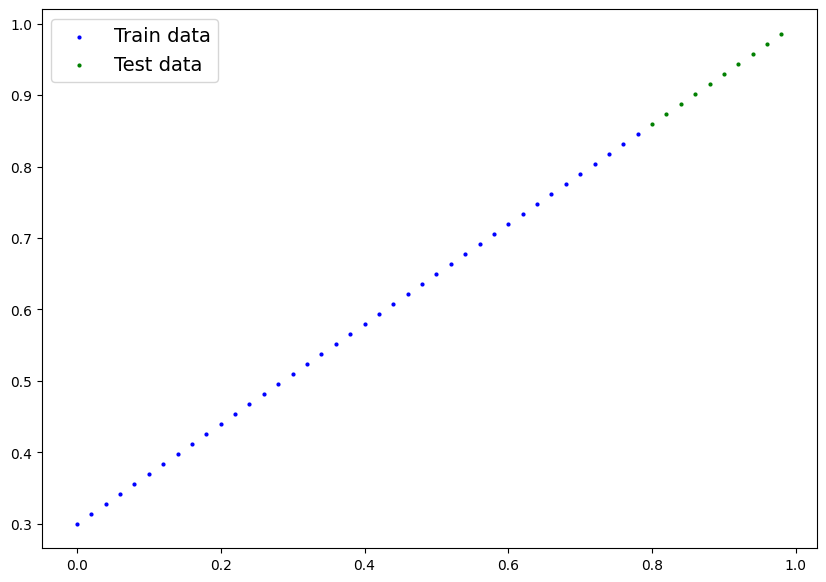

In [ ]:
plot_predictions()

## 2. Build Model

In [ ]:
# Create linear regression model
class LinearRegressionModel(nn.Module): # nn.Module: base class for all neural networks
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is Tensor
    """
    Args:
      x: tensor
    Returns: prediction
    """
    return self.weights * x + self.bias # this is the linear regression formula

## PyTorch model buiding essentials
* torch.nn.Module - the base class for all neural network modules
* torch.nn.Parameter - what parameters should our model try and learn
* torch.optim - this where the optimizers in PyTorch, they'll help with Gradient descent
* def forward() - all nn.Module subclasses require you forward()

In [ ]:
# create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## Make prediction using torch.inference_mode()
To check our model's predictive power, detect how well it predicts y_test based on X_test

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model

with torch.inference_mode(): # not tracking gradient this set
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

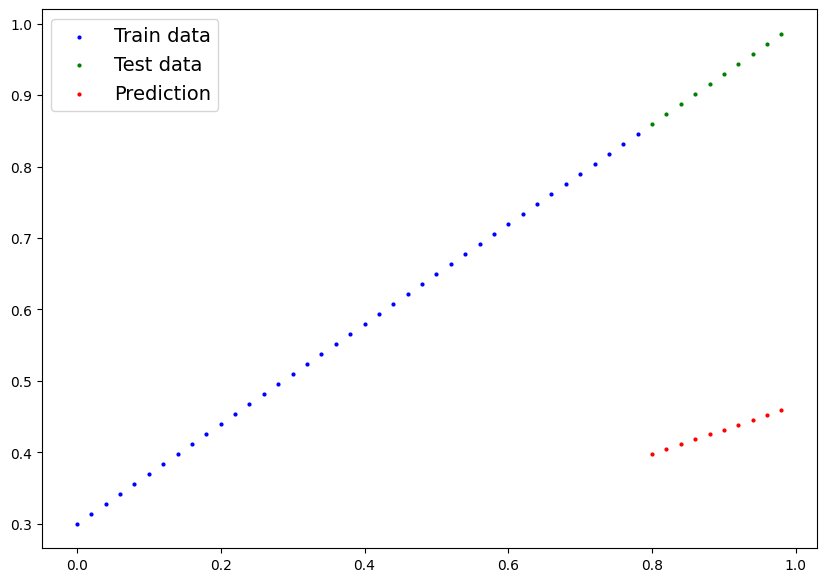

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Build a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (involves data moving through `forward()`) to make predictions on data - also called forward propagation
2. Calculate the loss (compare)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients
5. Optimizer step - adjust model's parameters to improve the lost


In [ ]:
with torch.no_grad():
  list(model_0.eval().parameters())

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# An epoch is one loop through the data
epochs = 100

# Setup tracking
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Loss calculation
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation (compute the loss gradient)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent, i.e. adjust w and b)
  optimizer.step() # by default how the optimizers changes will accumulate through the loop so... have to set zero in the step 3

  # testing
  model_0.eval() # turn off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

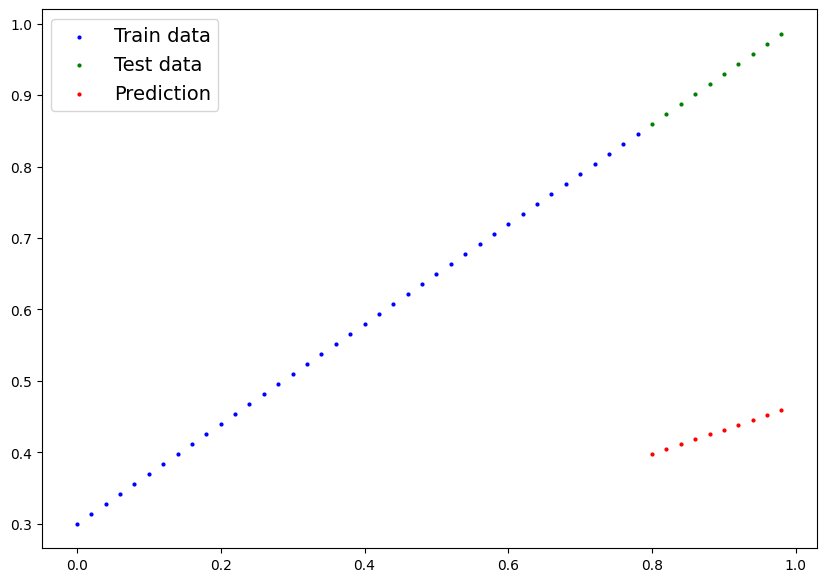

In [ ]:
plot_predictions(predictions=y_preds)

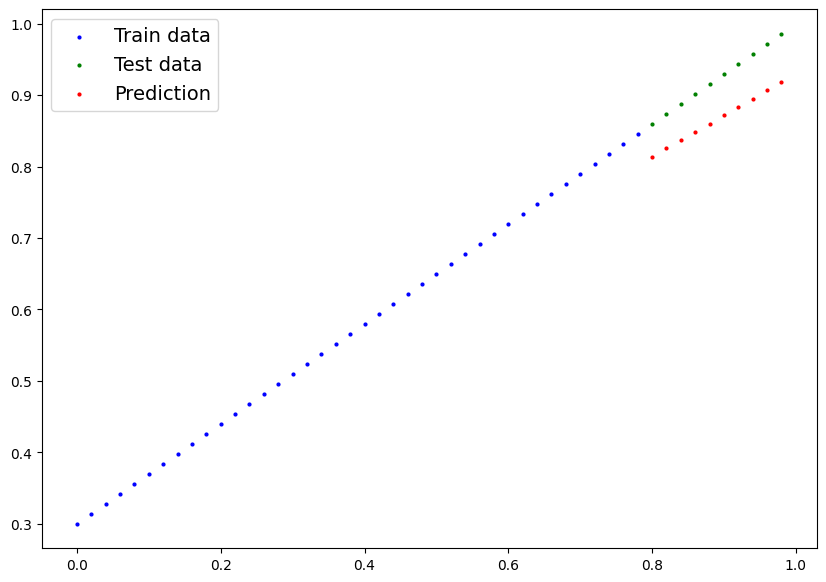

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
torch.tensor(loss_values).numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

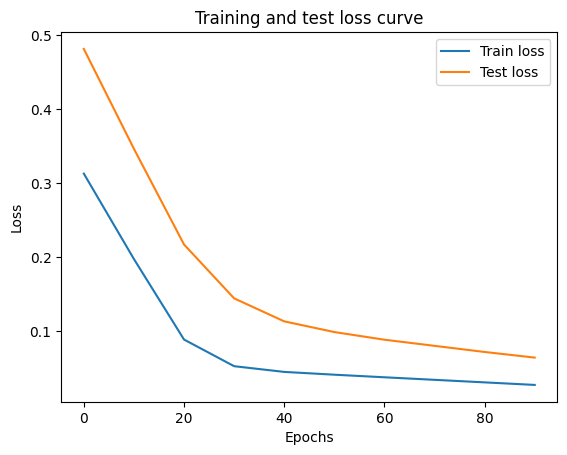

In [ ]:
# Plot the loss curve

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training and test loss curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Oct  5 13:13 01_pytorch_workflow_model_0.pth


# Load the model

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
loaded_model_0 = LinearRegressionModel() # new model

# load the saved stated_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-85-de21ccf527ee>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# Make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
# Make model predict
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Put it all together!

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.4.1+cu121'

Create device-agnostic device

In [ ]:
# set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device is: ", device)

device is:  cuda


In [ ]:
!nvidia-smi

Sat Oct  5 13:27:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0              26W /  70W |    105MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# ws
nn.module